In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dataset = pd.read_csv(r'C:\Users\aishw\OneDrive\Desktop\global\global terrorism data.csv',encoding='latin1')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
dataset.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Missing Values

In [5]:
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')


approxdate 0.9491  % missing values
resolution 0.9878  % missing values
provstate 0.0023  % missing values
city 0.0024  % missing values
latitude 0.0251  % missing values
longitude 0.0251  % missing values
specificity 0.0  % missing values
location 0.6946  % missing values
summary 0.364  % missing values
alternative 0.8403  % missing values
alternative_txt 0.8403  % missing values
attacktype2 0.9652  % missing values
attacktype2_txt 0.9652  % missing values
attacktype3 0.9976  % missing values
attacktype3_txt 0.9976  % missing values
targsubtype1 0.0571  % missing values
targsubtype1_txt 0.0571  % missing values
corp1 0.2342  % missing values
target1 0.0035  % missing values
natlty1 0.0086  % missing values
natlty1_txt 0.0086  % missing values
targtype2 0.9387  % missing values
targtype2_txt 0.9387  % missing values
targsubtype2 0.9412  % missing values
targsubtype2_txt 0.9412  % missing values
corp2 0.9443  % missing values
target2 0.9393  % missing values
natlty2 0.9404  % missing va

In [6]:
dataset.success.value_counts()

1    161632
0     20059
Name: success, dtype: int64

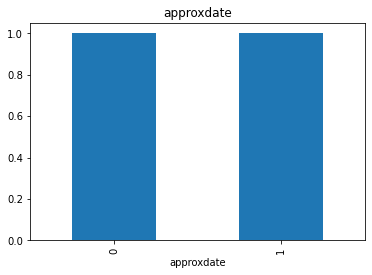

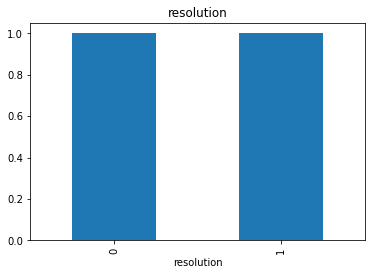

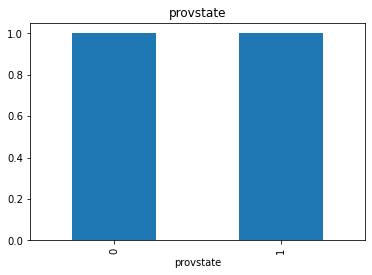

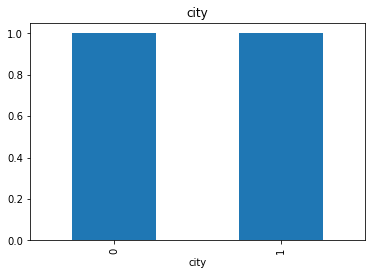

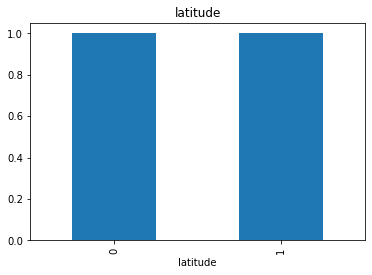

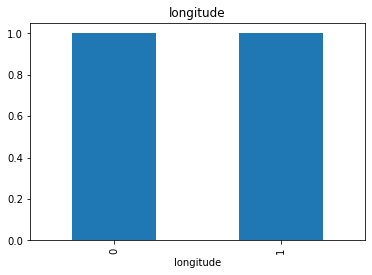

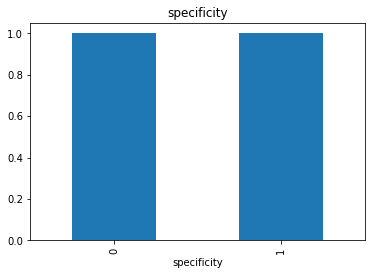

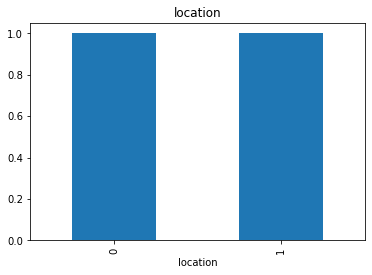

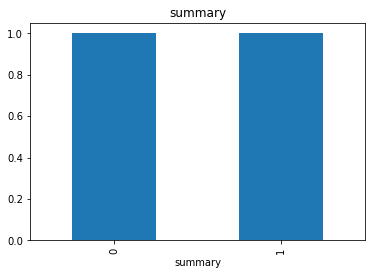

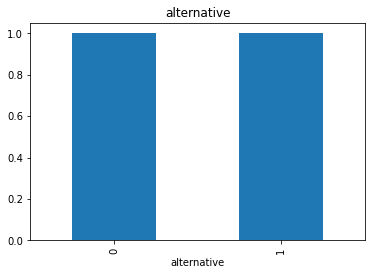

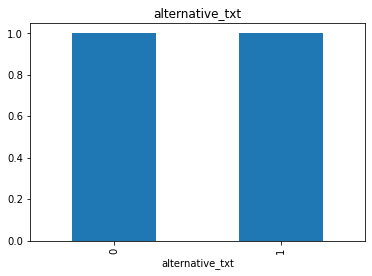

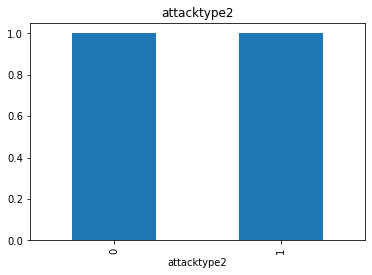

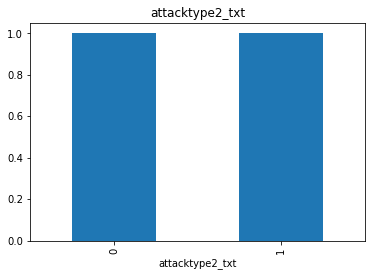

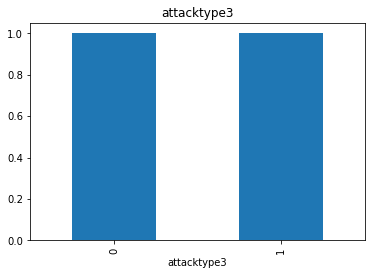

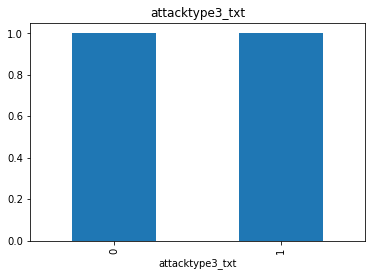

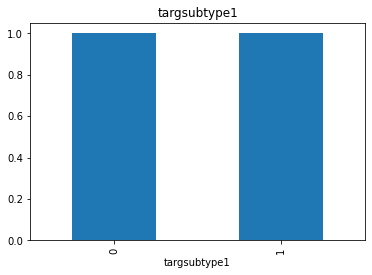

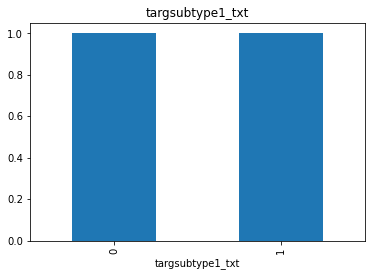

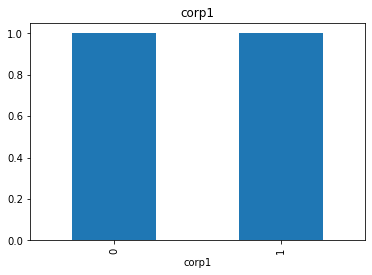

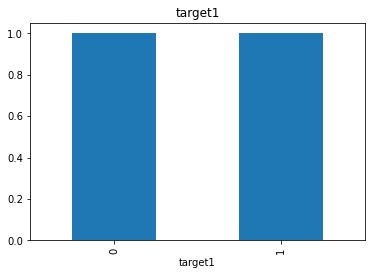

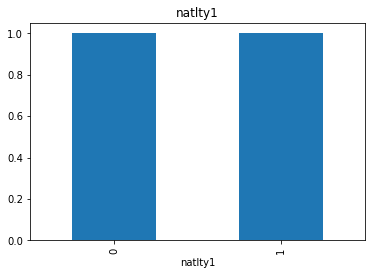

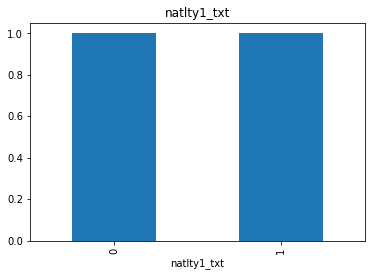

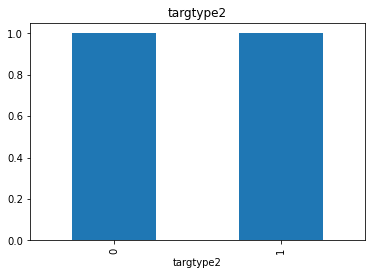

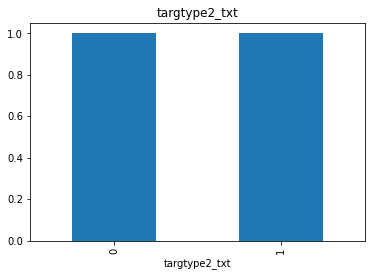

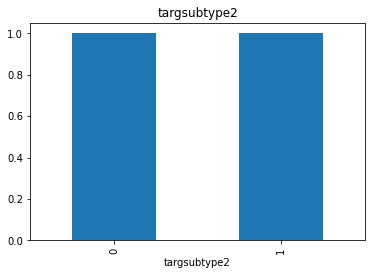

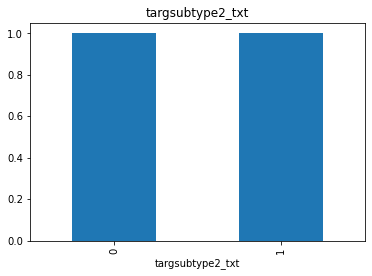

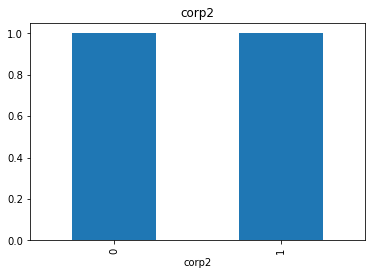

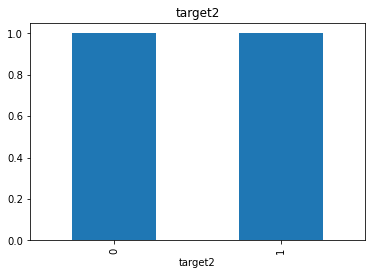

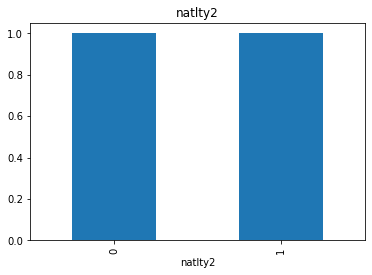

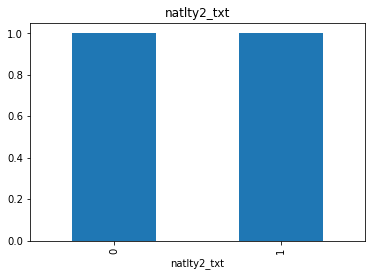

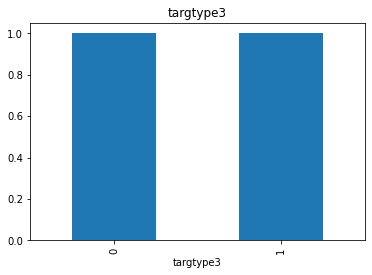

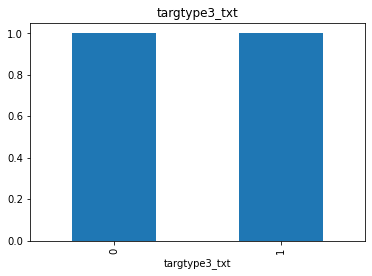

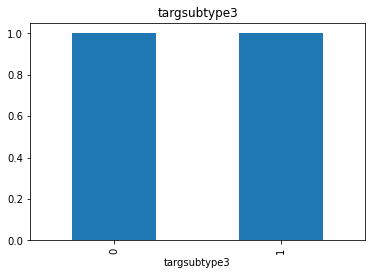

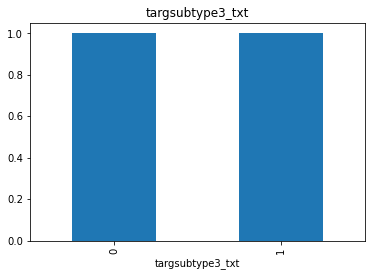

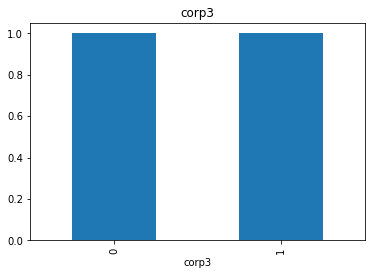

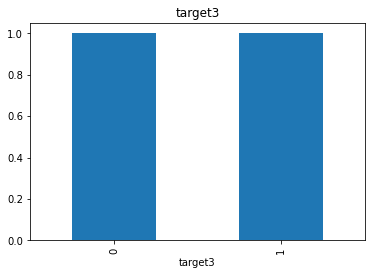

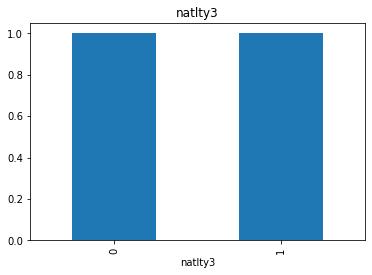

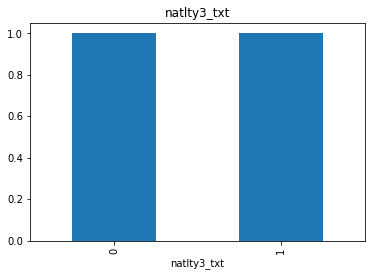

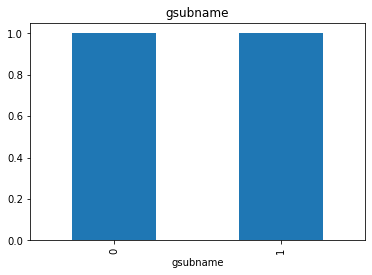

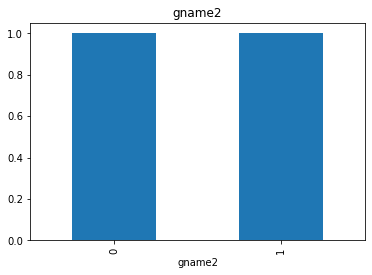

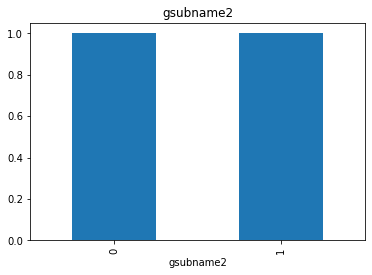

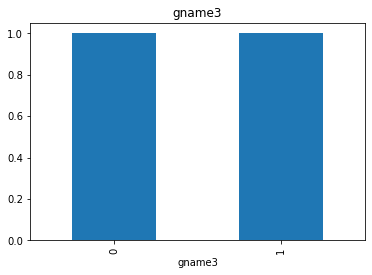

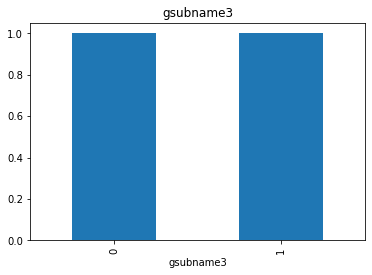

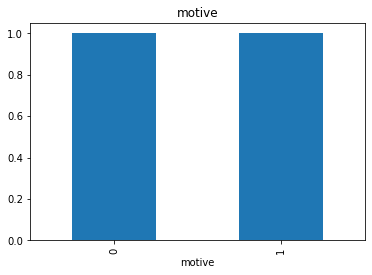

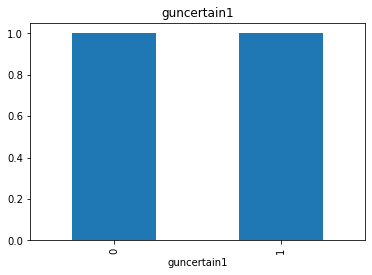

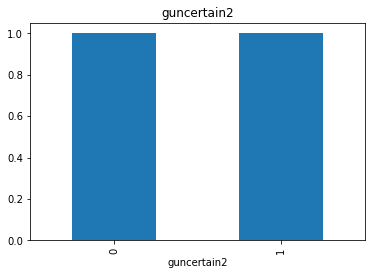

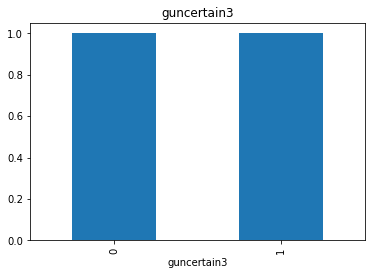

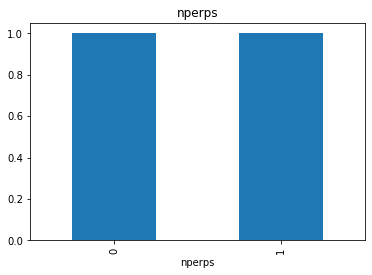

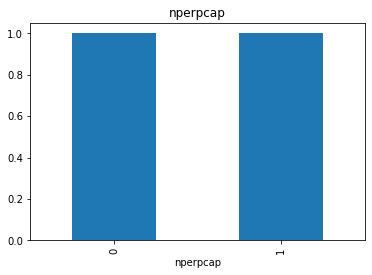

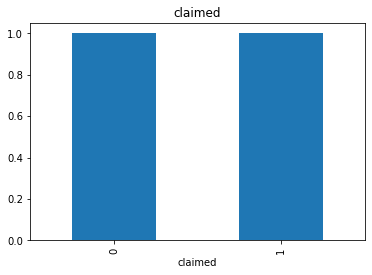

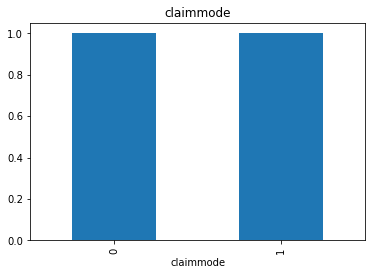

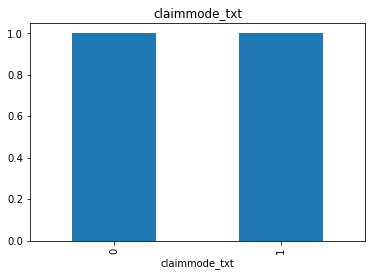

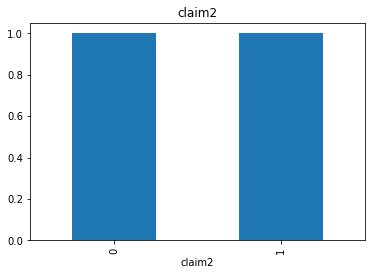

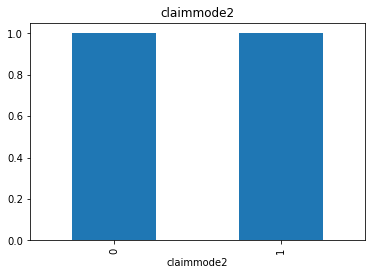

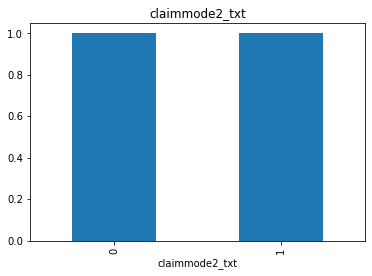

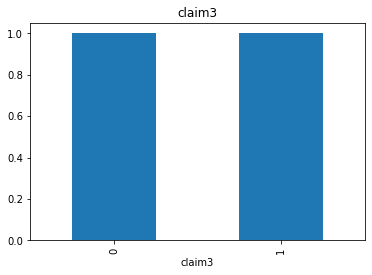

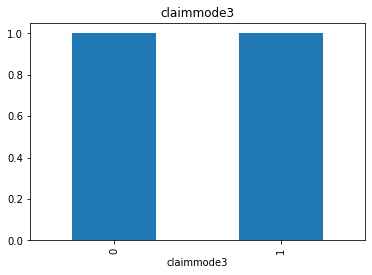

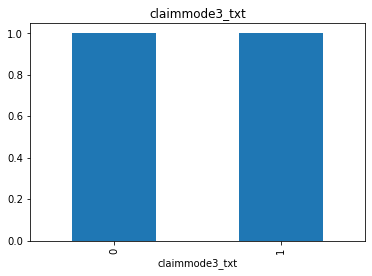

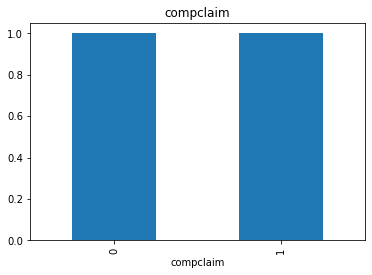

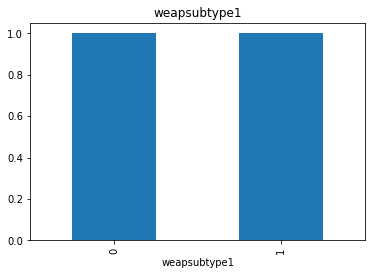

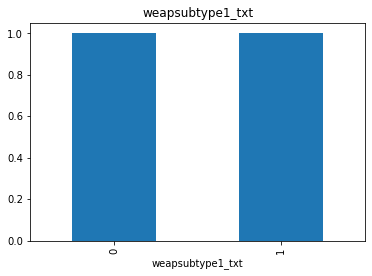

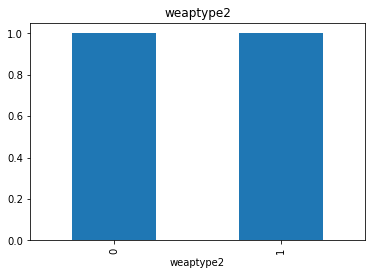

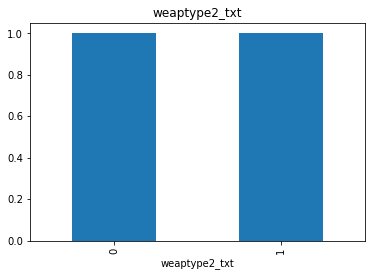

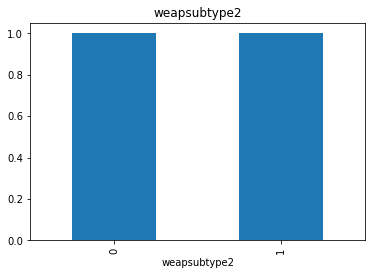

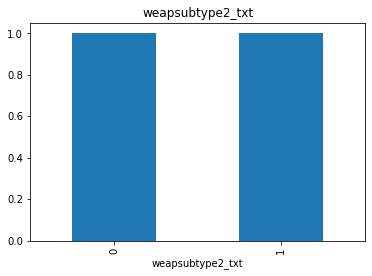

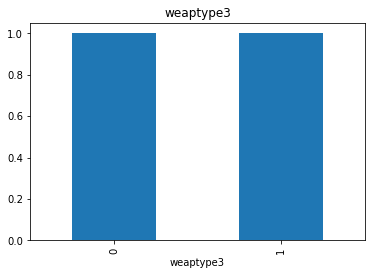

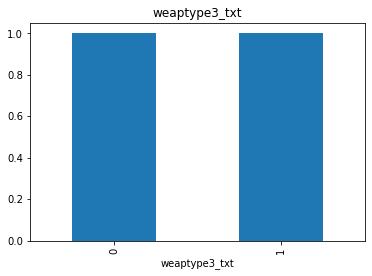

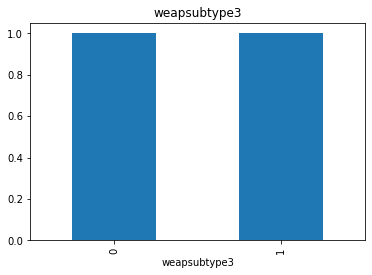

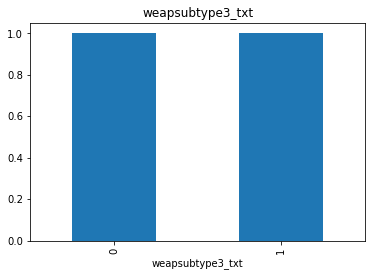

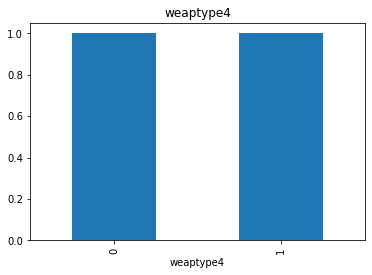

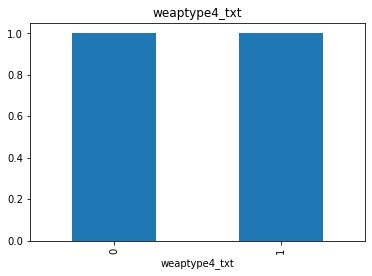

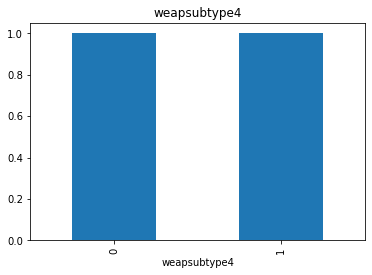

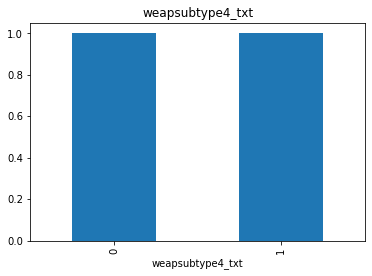

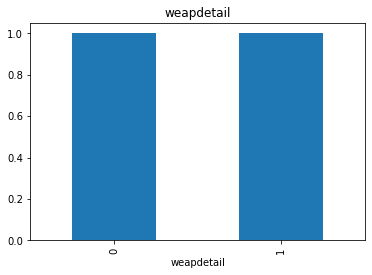

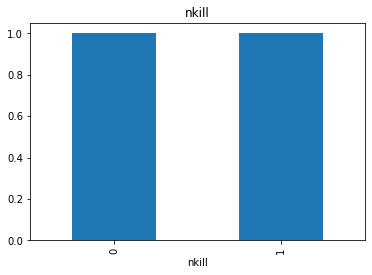

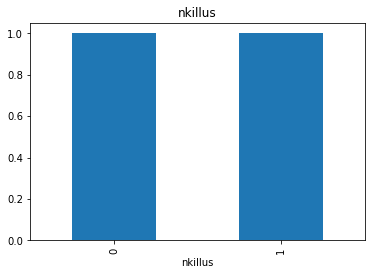

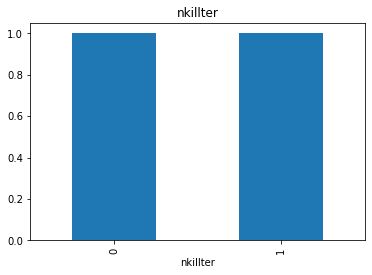

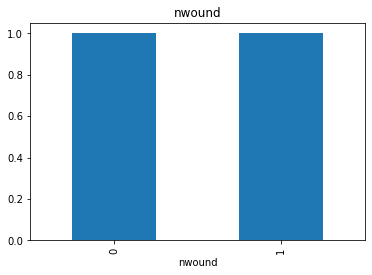

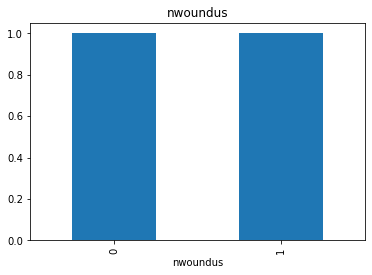

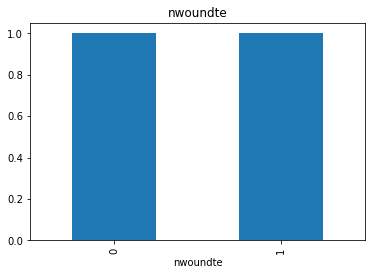

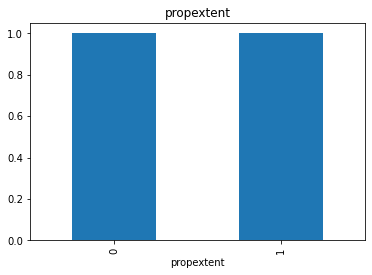

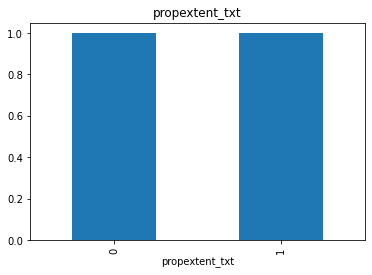

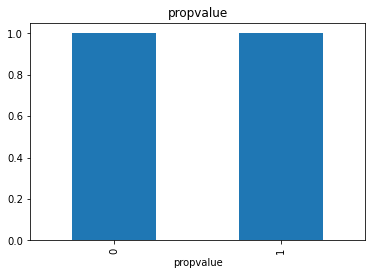

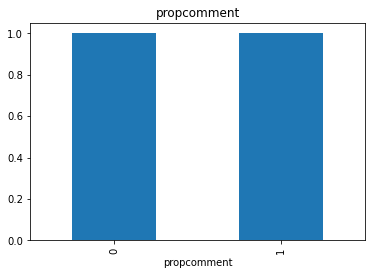

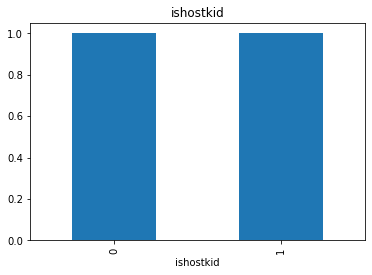

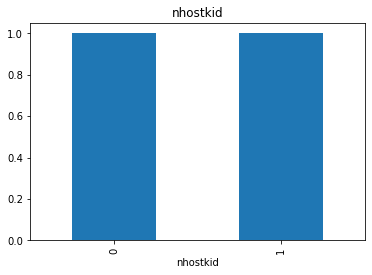

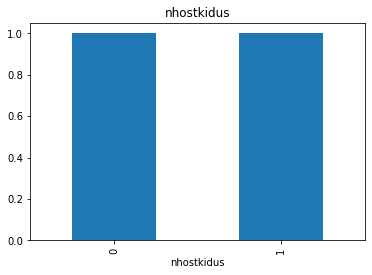

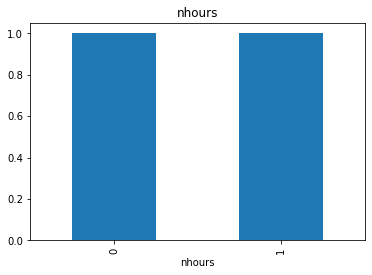

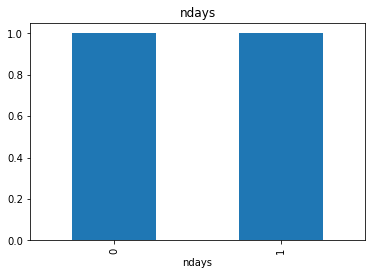

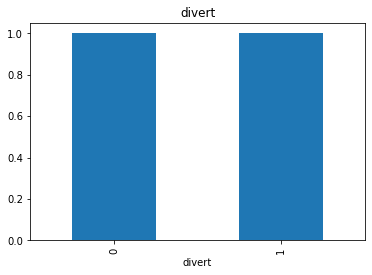

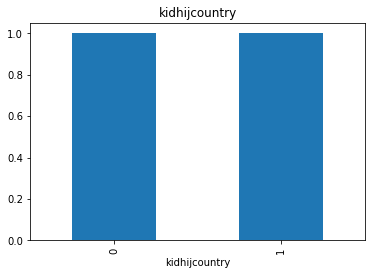

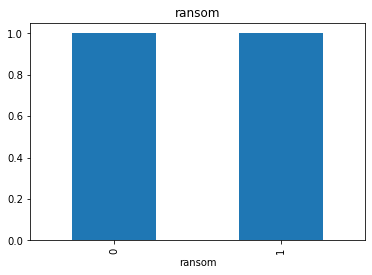

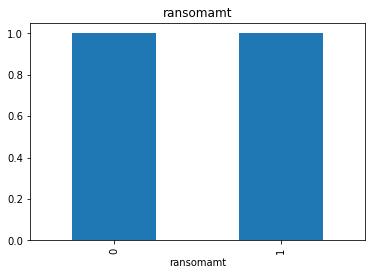

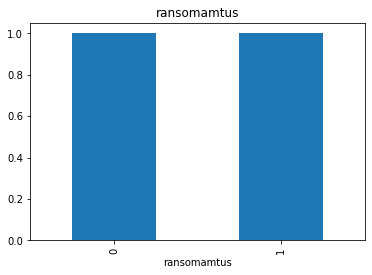

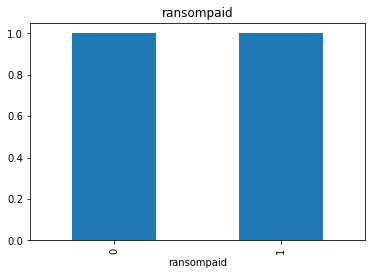

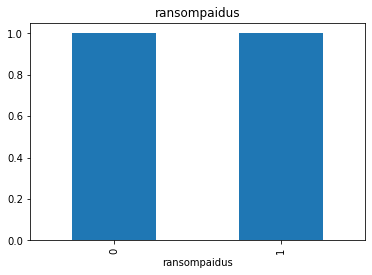

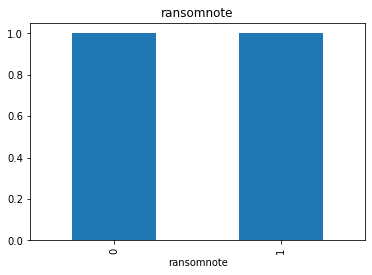

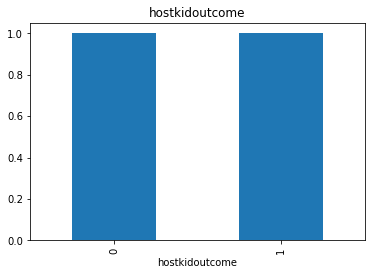

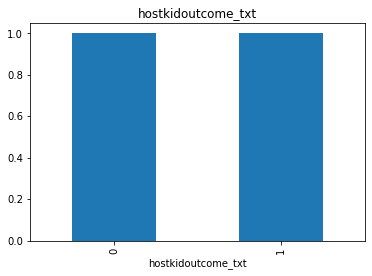

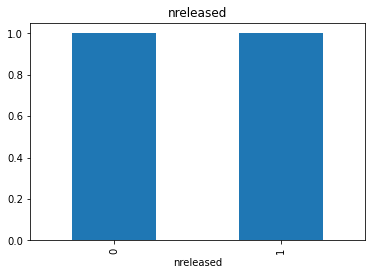

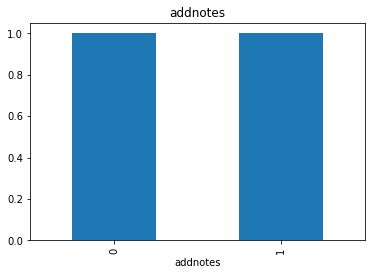

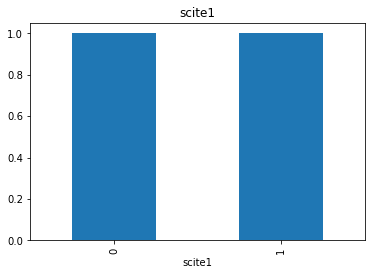

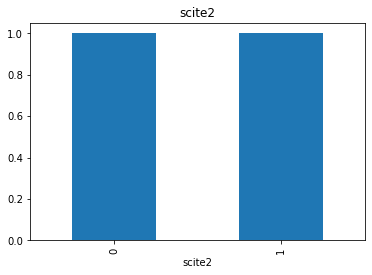

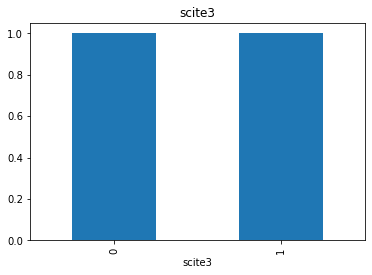

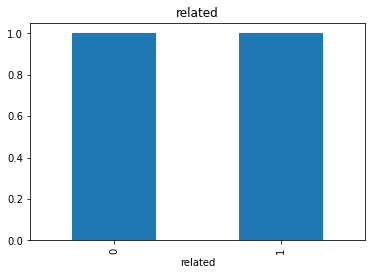

In [7]:
for feature in features_with_na:
    data = dataset.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['success'].median().plot.bar()
    plt.title(feature)
    plt.show()

### Numerical Variables

In [8]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  77


,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,2,18.456792,-69.951164,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
1,197000000002,1970,0,0,0,130,1,19.371887,-99.086624,1.0,...,800000.0,NaN,NaN,NaN,NaN,NaN,0,1,1,1
2,197001000001,1970,1,0,0,160,5,15.478598,120.599741,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-9,-9,1,1
3,197001000002,1970,1,0,0,78,8,37.997490,23.762728,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-9,-9,1,1
4,197001000003,1970,1,0,0,101,4,33.580412,130.396361,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-9,-9,1,1


### Temporal Variable

In [9]:
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature or 'year' in feature or 'yr' in feature]

year_feature

['iyear']

In [10]:
for feature in year_feature:
    print(feature, dataset[feature].unique())

iyear [1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1986 1982
 1983 1984 1985 1987 1988 1989 1990 1991 1992 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017]


In [11]:
discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 47


In [12]:
discrete_feature

['imonth',
 'extended',
 'region',
 'specificity',
 'vicinity',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype2',
 'attacktype3',
 'targtype1',
 'targtype2',
 'targtype3',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'claimed',
 'claimmode',
 'claim2',
 'claimmode2',
 'claim3',
 'claimmode3',
 'compclaim',
 'weaptype1',
 'weaptype2',
 'weaptype3',
 'weapsubtype3',
 'weaptype4',
 'weapsubtype4',
 'property',
 'propextent',
 'ishostkid',
 'ransom',
 'ransomamtus',
 'ransompaidus',
 'hostkidoutcome',
 'INT_LOG',
 'INT_IDEO',
 'INT_MISC',
 'INT_ANY']

In [13]:
dataset[discrete_feature].head()


,imonth,extended,region,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,...,propextent,ishostkid,ransom,ransomamtus,ransompaidus,hostkidoutcome,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,7,0,2,1.0,0,1,1,1,0.0,NaN,...,NaN,0.0,0.0,NaN,NaN,NaN,0,0,0,0
1,0,0,1,1.0,0,1,1,1,0.0,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,0,1,1,1
2,1,0,5,4.0,0,1,1,1,0.0,NaN,...,NaN,0.0,0.0,NaN,NaN,NaN,-9,-9,1,1
3,1,0,8,1.0,0,1,1,1,0.0,NaN,...,NaN,0.0,0.0,NaN,NaN,NaN,-9,-9,1,1
4,1,0,4,1.0,0,1,1,1,-9.0,NaN,...,NaN,0.0,0.0,NaN,NaN,NaN,-9,-9,1,1


In [ ]:
for feature in discrete_feature:
    data=dataset.copy()
    data.groupby(feature)['success'].plot.bar()
    plt.xlabel(feature)
    plt.ylabel('success')
    plt.title(feature)
    plt.show()

### Continuous Variable

In [14]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 29


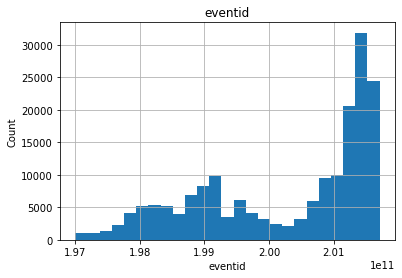

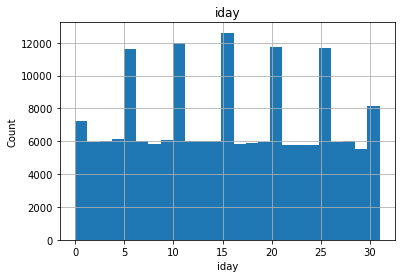

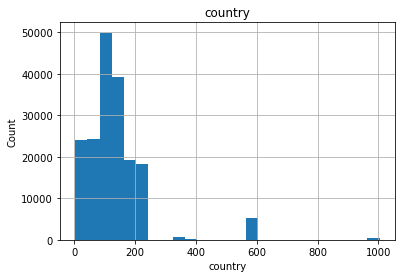

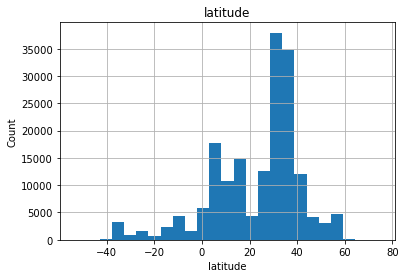

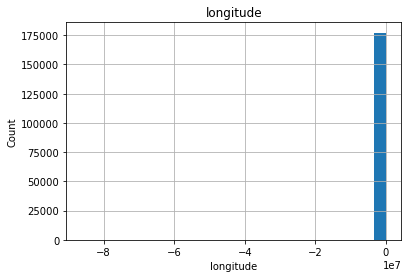

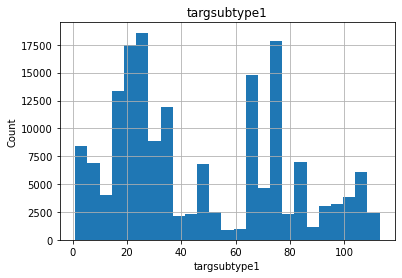

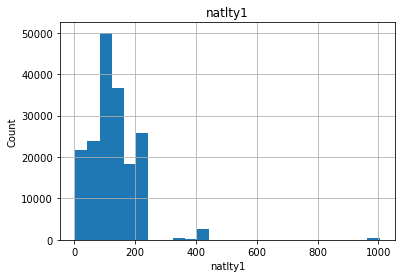

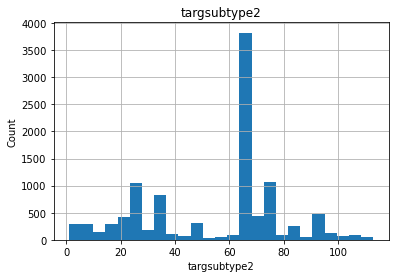

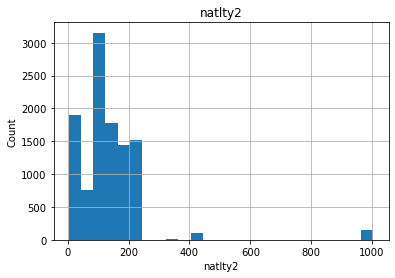

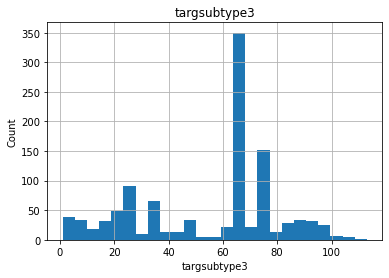

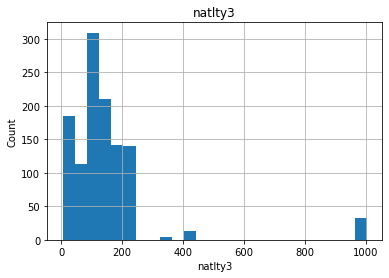

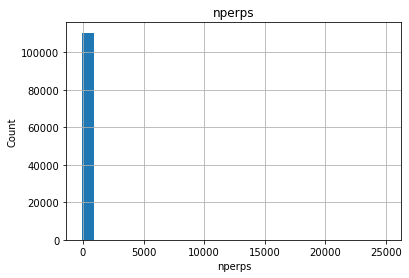

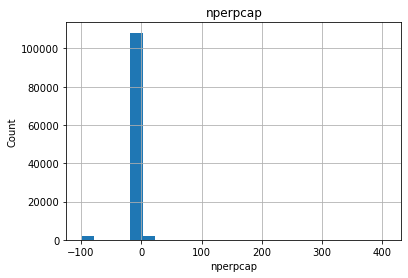

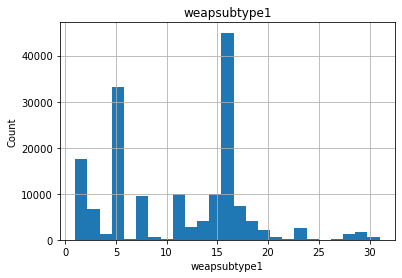

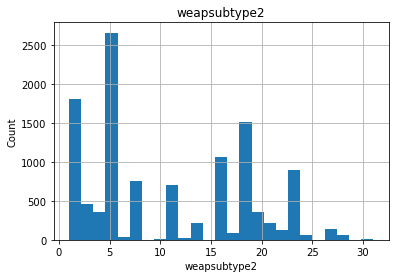

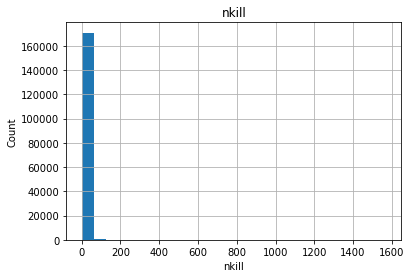

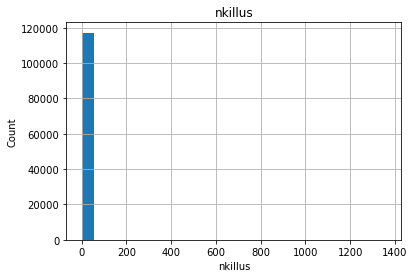

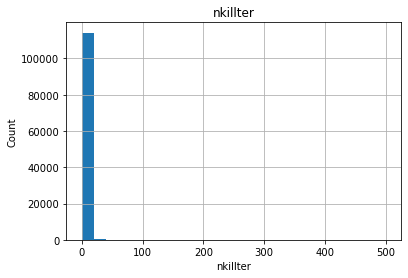

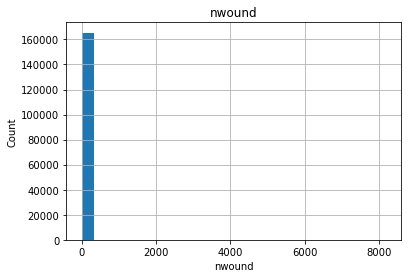

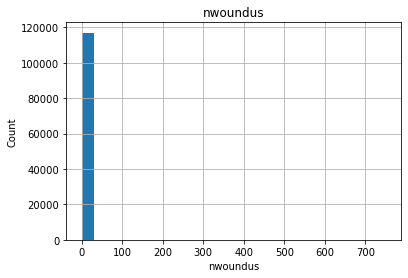

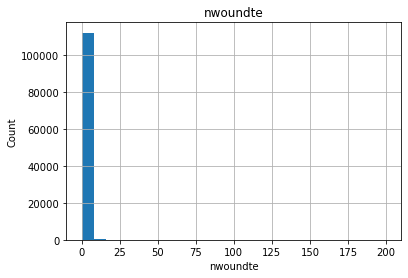

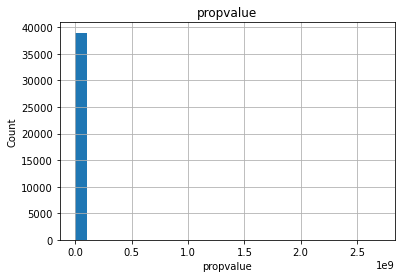

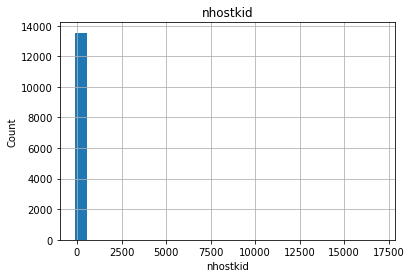

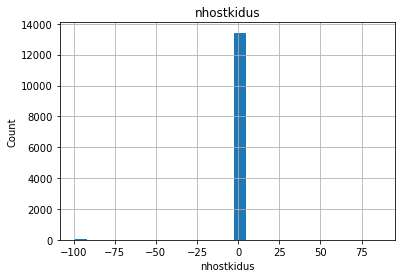

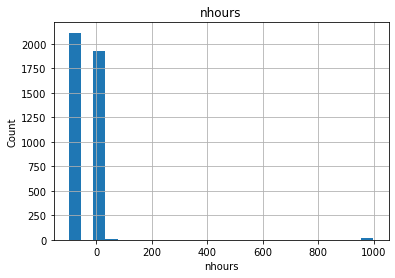

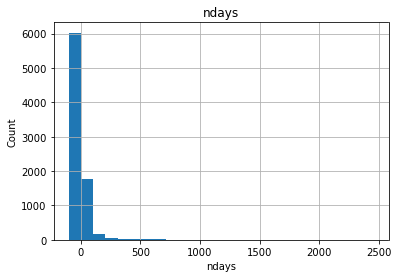

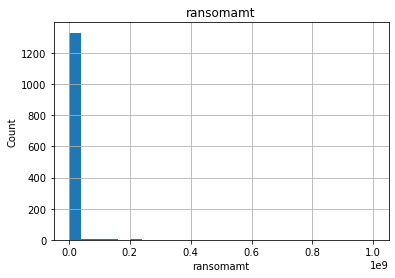

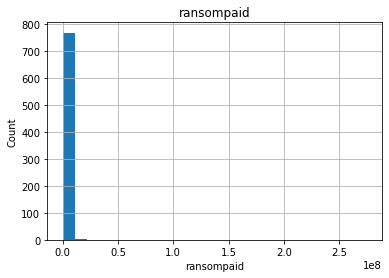

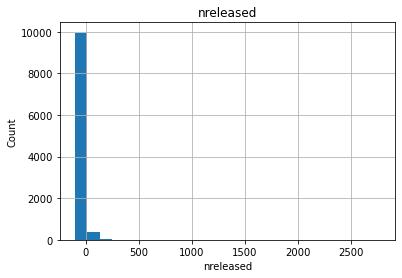

In [15]:
for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### Log Trasnsformation

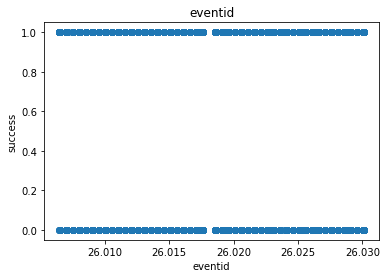

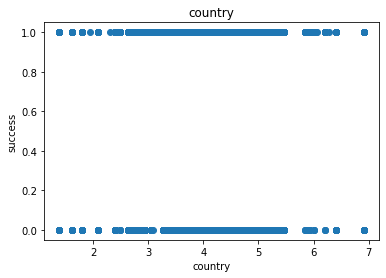

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


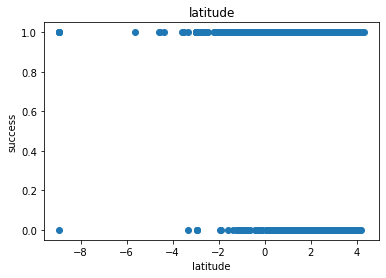

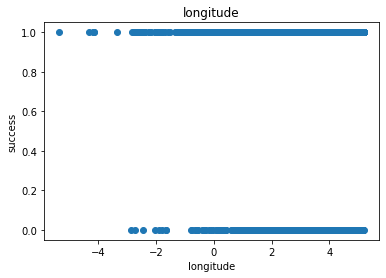

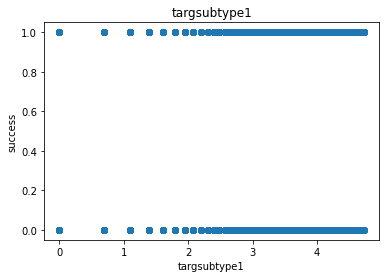

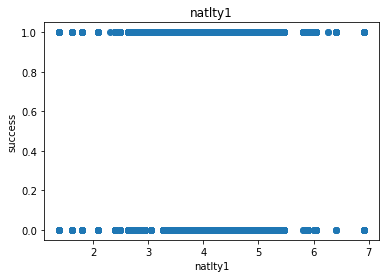

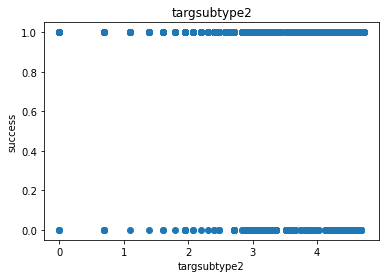

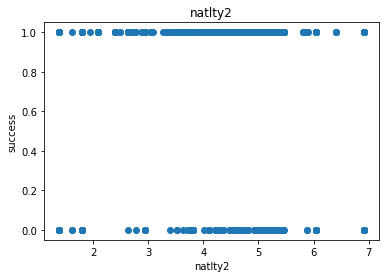

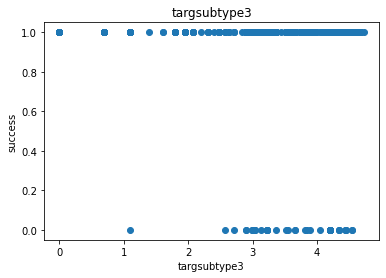

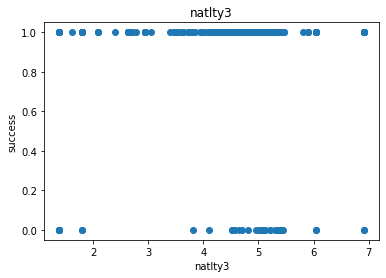

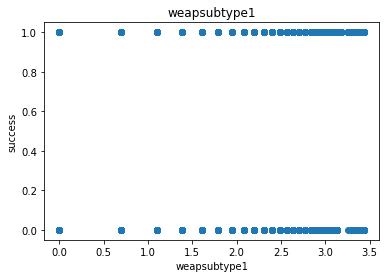

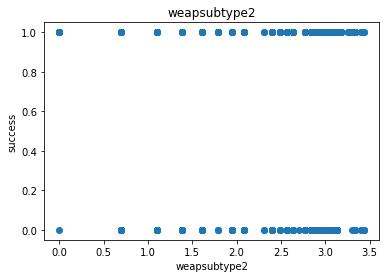

In [16]:
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        plt.scatter(data[feature],data['success'])
        plt.xlabel(feature)
        plt.ylabel('success')
        plt.title(feature)
        plt.show()


### Outliers

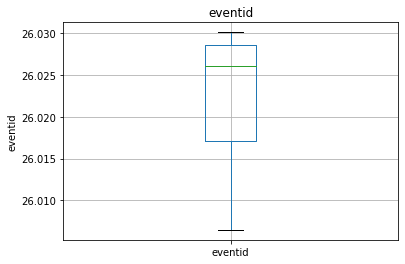

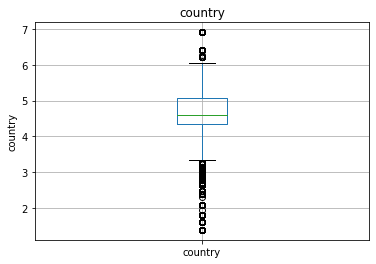

C:\Users\Omkar\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


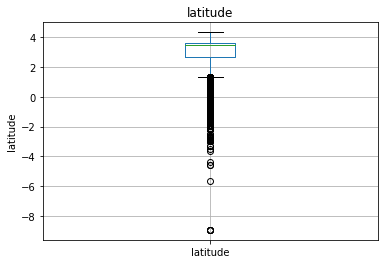

C:\Users\Omkar\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


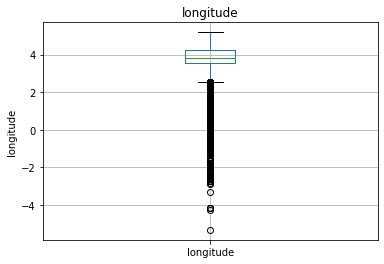

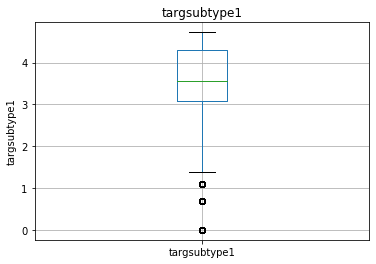

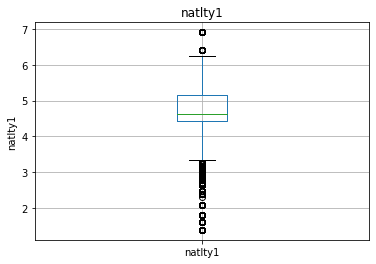

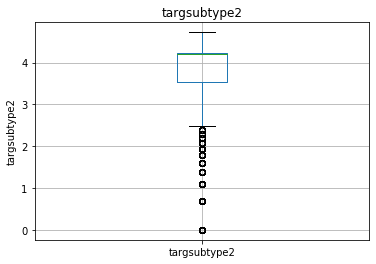

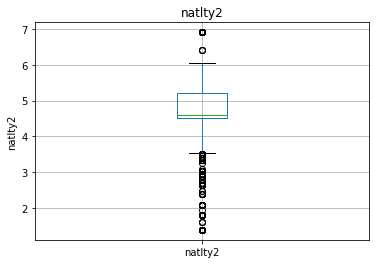

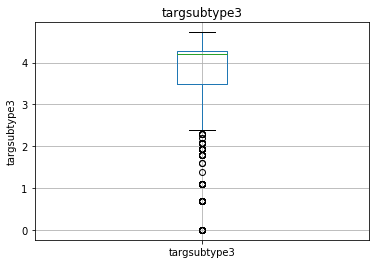

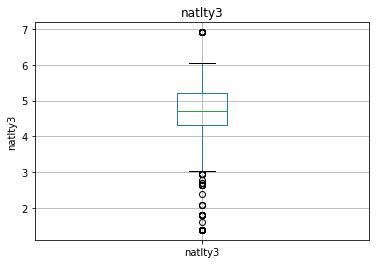

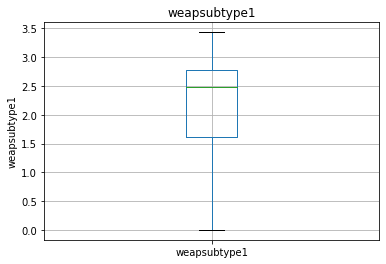

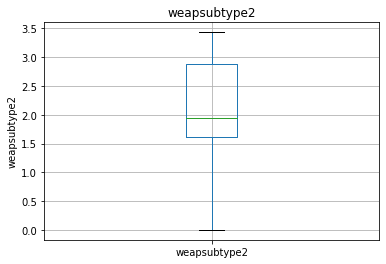

In [65]:
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

### Categorical Variables

In [17]:
categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='O' and len(dataset[feature].unique()) < 20 ]
categorical_features

['region_txt',
 'alternative_txt',
 'attacktype1_txt',
 'attacktype2_txt',
 'attacktype3_txt',
 'gsubname3',
 'claimmode_txt',
 'claimmode2_txt',
 'claimmode3_txt',
 'weaptype1_txt',
 'weaptype2_txt',
 'weaptype3_txt',
 'weaptype4_txt',
 'weapsubtype4_txt',
 'propextent_txt',
 'hostkidoutcome_txt']

In [18]:
dataset[categorical_features].head()

,region_txt,alternative_txt,attacktype1_txt,attacktype2_txt,attacktype3_txt,gsubname3,claimmode_txt,claimmode2_txt,claimmode3_txt,weaptype1_txt,weaptype2_txt,weaptype3_txt,weaptype4_txt,weapsubtype4_txt,propextent_txt,hostkidoutcome_txt
0,Central America & Caribbean,NaN,Assassination,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
1,North America,NaN,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
2,Southeast Asia,NaN,Assassination,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
3,Western Europe,NaN,Bombing/Explosion,NaN,NaN,NaN,NaN,NaN,NaN,Explosives,NaN,NaN,NaN,NaN,NaN,NaN
4,East Asia,NaN,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:

for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))
    

The feature is region_txt and number of categories are 12
The feature is alternative_txt and number of categories are 6
The feature is attacktype1_txt and number of categories are 9
The feature is attacktype2_txt and number of categories are 10
The feature is attacktype3_txt and number of categories are 9
The feature is gsubname3 and number of categories are 15
The feature is claimmode_txt and number of categories are 11
The feature is claimmode2_txt and number of categories are 10
The feature is claimmode3_txt and number of categories are 9
The feature is weaptype1_txt and number of categories are 12
The feature is weaptype2_txt and number of categories are 12
The feature is weaptype3_txt and number of categories are 11
The feature is weaptype4_txt and number of categories are 6
The feature is weapsubtype4_txt and number of categories are 17
The feature is propextent_txt and number of categories are 5
The feature is hostkidoutcome_txt and number of categories are 8


In [ ]:

for feature in categorical_features:
    data=dataset.copy()
    data.groupby(feature)['success'].plot.bar()
    plt.xlabel(feature)
    plt.ylabel('success')
    plt.title(feature)
    plt.show()